In [1]:
import os
os.chdir("..")

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Simulate Densities

In [4]:
from utils.simulation import GaussianMixture
#from cde.density_estimator import KernelMixtureNetwork

""" simulate some data """
density_simulator = GaussianMixture(n_kernels=10, ndim_x=5, ndim_y=2, means_std=1.5, random_seed=22)
X, Y = density_simulator.simulate(n_samples=3000)

In [5]:
X

array([[ 1.40786423,  0.3243206 , -0.07360769,  1.40392014,  4.54641376],
       [-1.55577241, -2.97322956,  2.50837114, -2.14117092, -0.15207284],
       [-0.55541848, -5.01416175,  1.32887708, -1.134342  , -1.93161664],
       ...,
       [ 4.19652091,  0.6939986 ,  3.05721386, -3.40886079, -0.75434353],
       [-1.79695294, -1.06318046,  1.0669368 , -0.41045942,  3.10406715],
       [ 1.10373543, -4.65591616,  0.99657651,  0.23984093, -0.19092267]])

In [6]:
Y

array([[ 1.85184562,  0.76741824],
       [-3.7434237 , -3.95023192],
       [-2.17464621,  0.75305045],
       ...,
       [ 0.32938478,  0.71242916],
       [ 1.84577961,  1.02843588],
       [-0.55548209, -0.78596486]])

# Plotting

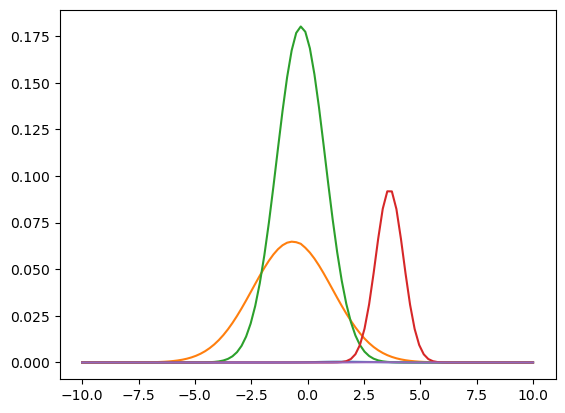

In [7]:
linspace = np.linspace(-10, 10, 100)
y_space = np.reshape(linspace, (-1, 1))


for x in X[np.random.choice(X.shape[0], 5)]:
    x_space = np.repeat(np.reshape(x, (1,-1)), 100, axis=0)
    densities = density_simulator.pdf(x_space, y_space)

    plt.plot(linspace, densities)
plt.show()

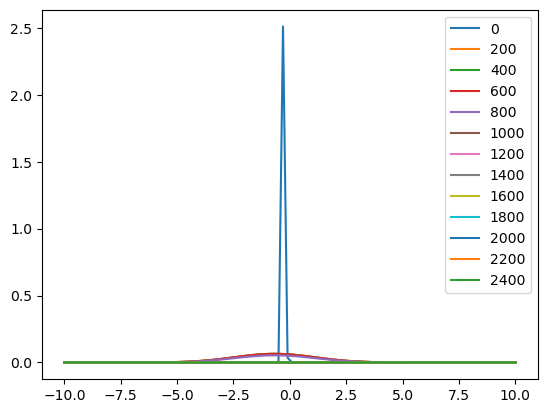

In [8]:
linspace = np.linspace(-10, 10, 100)
y_space = np.reshape(linspace, (-1, 1))

base_x = X[0]
base_x_permuted = np.repeat(np.reshape(base_x, (1,-1)), X.shape[0], axis=0)
base_x_permuted[:,0] = np.sort(X[:,0])

indices = range(0,2500,200)
for idx, x in enumerate(base_x_permuted[indices]):
    x_space = np.repeat(np.reshape(x, (1,-1)), 100, axis=0)
    densities = density_simulator.pdf(x_space, y_space)

    plt.plot(linspace, densities, label=str(indices[idx]))
plt.legend()
plt.show()

Starting Animation


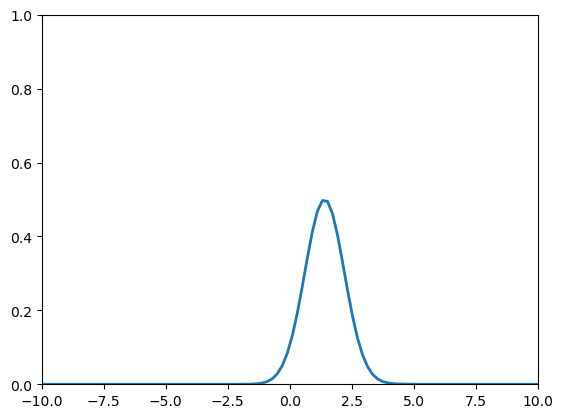

In [9]:
linspace = np.linspace(-10, 10, 100)
y_space = np.reshape(linspace, (-1, 1))

base_x = X[0]
base_x_permuted = np.repeat(np.reshape(base_x, (1,-1)), X.shape[0], axis=0)
base_x_permuted[:,0] = np.sort(X[:,0])

indices = range(len(base_x_permuted))

precomputed_densities = []
for x in base_x_permuted[indices]:
    x_space = np.repeat(np.reshape(x, (1,-1)), 100, axis=0)
    densities = density_simulator.pdf(x_space, y_space)
    precomputed_densities.append(densities)

# Set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim((np.min(linspace), np.max(linspace)))
ax.set_ylim((0, 1))  # Adjust y limits if needed based on your densities

line, = ax.plot([], [], lw=2)

# Initialization function: plot the background of each frame
def init():
    line.set_data(linspace, precomputed_densities[0])
    return (line,)

# Animation function: this is called sequentially
def animate(i):
    line.set_data(linspace, precomputed_densities[i])
    #ax.set_title(f'Frame {indices[i]}')
    return (line,)

print("Starting Animation")
# Call the animator
ani = FuncAnimation(fig, animate, init_func=init,
                    frames=range(len(indices)), interval=10, blit=True)

# Show the animation
plt.show()

In [ ]:
ani.save(filename="pillow_example.gif", writer="pillow")